Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 87us/sample - loss: 0.2221 - acc: 0.9335 - val_loss: 0.0948 - val_acc: 0.9742
Epoch 2/10
54000/54000 [==============================] - 4s 69us/sample - loss: 0.0884 - acc: 0.9726 - val_loss: 0.0780 - val_acc: 0.9748
Epoch 3/10
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0607 - acc: 0.9809 - val_loss: 0.0819 - val_acc: 0.9757
Epoch 4/10
54000/54000 [==============================] - 4s 82us/sample - loss: 0.0449 - acc: 0.9858 - val_loss: 0.0812 - val_acc: 0.9777
Epoch 5/10
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0365 - acc: 0.9881 - val_loss: 0.0998 - val_acc: 0.9752
Epoch 6/10
54000/54000 [==============================] - 4s 67us/sample - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0741 - val_acc: 0.9795
Epoch 7/10
54000/54000 [==============================] - 4s 81us/sample - loss: 0.0238 - acc: 0.9924 - val_loss: 0.0

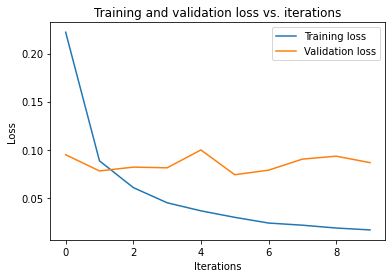

Test accuracy: 0.979


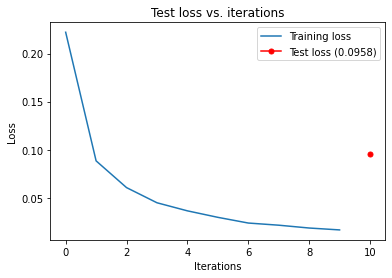

In [26]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the FNN architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# Plot the training and validation loss vs. iterations
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and validation loss vs. iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'])
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the test loss vs. iterations
plt.plot(history.history['loss'])
plt.plot([10], [test_loss], marker='o', markersize=5, color="red")
plt.title('Test loss vs. iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training loss', f'Test loss ({test_loss:.4f})'])
plt.show()
